In [1]:
!pip install -q keras-ocr

  DEPRECATION: validators is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install python-Levenshtein

  Using cached python_Levenshtein-0.21.1-py3-none-any.whl (9.4 kB)
  Using cached Levenshtein-0.21.1-cp311-cp311-macosx_11_0_arm64.whl (99 kB)
  Using cached rapidfuzz-3.2.0-cp311-cp311-macosx_11_0_arm64.whl (1.1 MB)

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install wordninja

  Using cached wordninja-2.0.0.tar.gz (541 kB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: wordninja is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for wordninja ... done

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl (1.9 kB)
  Using cached tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl (189.3 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl (20.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.0 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached wrapt-1.15.0-cp311-cp311-macosx_11_0_arm64.whl (36 kB)
  Using cached grpcio-1.56.2-cp311-cp311-macosx_10_10_uni

In [6]:
import keras_ocr
import matplotlib.pyplot as plt
import Levenshtein
import wordninja

In [7]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /Users/yaseminozkut/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/yaseminozkut/.keras-ocr/crnn_kurapan.h5


In [8]:
images = [
    keras_ocr.tools.read(img) for img in ['corn1.png',
                                          'corn2.png',
                                          'beans4.png'
    ]
]

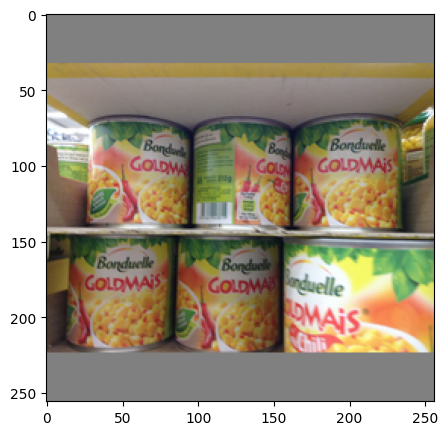

In [9]:
plt.figure(figsize = (5,10))
plt.imshow(images[0])

In [10]:
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 2s 2s/step


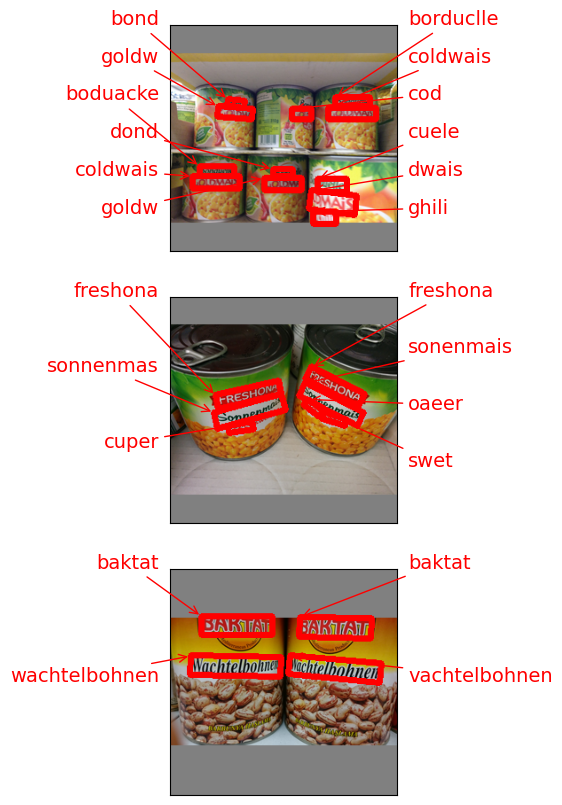

In [11]:
fig, axs = plt.subplots(nrows=len(images), figsize=(5, 10))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

In [12]:
word_list = []
for prediction in prediction_groups:
  for p in prediction:
    word_list.append(p[0])

new_list = []

In [13]:
product_dict = {"beans", "bohnen", "mehl", "zucker", "mais"}

In [14]:
def find_closest_word(word_list, dictionary):
    for word in word_list:
        closest_word = None
        min_distance = float('inf')  # Set an initial large value for minimum distance

        for dict_word in dictionary:
            distance = Levenshtein.distance(word, dict_word)
            if distance < min_distance:
                min_distance = distance
                closest_word = dict_word

        # If the minimum distance is greater than a threshold (e.g., 2), consider it "other"
        threshold = 2
        if min_distance > threshold:
            print(f"{word} -> other")
        else:
            print(f"{word} -> {closest_word}")

# Example usage:

find_closest_word(word_list, product_dict)

borduclle -> other
bond -> other
goldw -> other
coldwais -> other
cod -> other
boduacke -> other
dond -> other
coldwais -> other
goldw -> other
cuele -> other
dwais -> mais
ghili -> other
freshona -> other
freshona -> other
sonenmais -> other
sonnenmas -> other
oaeer -> other
swet -> other
cuper -> other
baktat -> other
baktat -> other
wachtelbohnen -> other
vachtelbohnen -> other
